In [2]:
import numpy as np
import os
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import PIL.Image
from read_HiC import name_chromosomes

import sys
path=r'C:\Users\scalvinib\Documents\Phd_project_reduced\work directory jupyter lab\topology\genome_topology\functions'
sys.path.append(path)

from plotting_tools import set_layout
from genome_topology import normalize_psc
from genome_topology import get_matrix
from genome_topology import fractal_dimension
from genome_topology import make_graph

In [35]:
contacts=pd.read_csv('data/Hi-C data/test1.txt', sep= '\t', header= None )
contacts.columns =['Index1', 'Index2', 'Counts']
  

In [36]:
contacts

,Index1,Index2,Counts
0,0,0,1196.0
1,0,9,172.0
2,9,9,915.0
3,0,18,74.0
4,9,18,194.0
...,...,...,...
109270,4140,4635,2.0
109271,4149,4635,2.0
109272,4158,4635,4.0
109273,4167,4635,1.0


In [33]:
thresh_counts= 100
plot_matrix=True
path_savematrix='results/matrices/ecoli'
selected_contacts=contacts[contacts['Counts']>=thresh_counts]

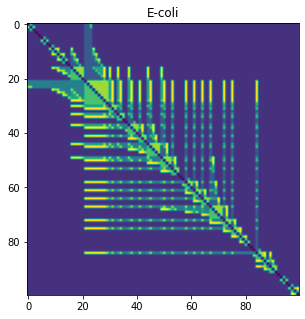

In [34]:
index= [selected_contacts['Index1'], selected_contacts['Index2']]
index=np.array(index)
index= np.transpose(index)
N_contacts = len(index)
mat, psc = get_matrix(index, 'Ecoli')
P, S, X=normalize_psc(psc, N_contacts)
Dim_fractal, r2_fractalfit=fractal_dimension(mat, plot_fig=0)
G=make_graph(index)
clustering= nx.average_clustering(G)
    
if plot_matrix:
    plt.figure(figsize=(5, 5))
    plt.imshow(mat[600:700, 600:700])
    plt.title('E-coli')
    
if path_savematrix:
    PIL.Image.fromarray(mat.astype(float)).save("{}/top_matrix.tif".format(
        path_savematrix))

In [29]:
Dim_fractal

1.0734090673551042

In [43]:
index= [selected_contacts['Index1'], selected_contacts['Index2']]
index=np.array(index)
index= np.transpose(index)

In [44]:
index.shape

(701, 2)

In [45]:
index

array([[   0,    0],
       [   0,    9],
       [   9,    9],
       ...,
       [4176, 4176],
       [4176, 4185],
       [4176, 4194]], dtype=int64)